# Property Value Estimation using 2% Sample
This notebook prepares a 2% sample from the full NYC property dataset, performs cleaning, encodes categorical variables, removes extreme property values, and prepares the dataset for modeling.

In [1]:
# Step 1: Mount Google Drive and load dataset
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
file_path = '/content/drive/My Drive/SMU_MITB_AML/Group Project/Property_Valuation_and_Assessment_Data.csv'
df = pd.read_csv(file_path)
print('Full dataset shape:', df.shape)
df.head()

Mounted at /content/drive
Full dataset shape: (9845857, 40)


,BBLE,BORO,BLOCK,LOT,EASEMENT,OWNER,BLDGCL,TAXCLASS,LTFRONT,LTDEPTH,...,VALTYPE,Borough,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,NTA,New Georeferenced Column
0,1000163859,1,16,3859,NaN,"CHEN, QI TOM",R4,2,0,0,...,AC-TR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1000730028,1,73,28,NaN,NYC DSBS,V1,4,183,52,...,AC-TR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1000730029,1,73,29,NaN,NYC DSBS,Y7,4,90,500,...,AC-TR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1000297504,1,29,7504,NaN,NaN,R0,2,36,73,...,AC-TR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1000360012,1,36,12,NaN,NYC DSBS,Y7,4,534,604,...,AC-TR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [2]:
# Step 2: Sample 2% of data and save
import numpy as np
np.random.seed(42)
twopercent = df.sample(frac=0.02)
print('2% sample shape:', twopercent.shape)
twopercent_file_path = '/content/drive/My Drive/SMU_MITB_AML/Group Project/twopercent.csv'
twopercent.to_csv(twopercent_file_path, index=False)
print(f"Saved to {twopercent_file_path}")

2% sample shape: (196917, 40)
Saved to /content/drive/My Drive/SMU_MITB_AML/Group Project/twopercent.csv


In [3]:
# Step 3: Load 2% data for cleaning
df = pd.read_csv('/content/drive/My Drive/SMU_MITB_AML/Group Project/twopercent.csv')
print('Initial shape:', df.shape)

Initial shape: (196917, 40)


/tmp/ipython-input-3-63339997.py:2: DtypeWarning: Columns (0,4) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/drive/My Drive/SMU_MITB_AML/Group Project/twopercent.csv')


In [4]:
# Step 4: Drop columns with high missing values
columns_to_drop = ['EASEMENT', 'EXMPTCL', 'AVLAND2', 'AVTOT2', 'EXLAND2', 'EXTOT2', 'EXCD2']
df = df.drop(columns=[col for col in columns_to_drop if col in df.columns])

In [5]:
# Step 5: Remove rows with extremely high FULLVAL (e.g., > 5e7)
df = df[df['FULLVAL'] < 5e7]
print('After removing extreme FULLVAL:', df.shape)

After removing extreme FULLVAL: (196609, 33)


In [6]:
# Step 6: Drop rows with missing values in required fields
required_cols = ['FULLVAL', 'BORO', 'BLOCK', 'LOT', 'TAXCLASS', 'LTFRONT', 'LTDEPTH',
                 'AVLAND', 'AVTOT', 'BLDFRONT', 'BLDDEPTH', 'EXLAND', 'EXTOT',
                 'OWNER', 'BLDGCL', 'POSTCODE', 'Borough']
df = df.dropna(subset=required_cols)
print('After dropping rows with missing required fields:', df.shape)

After dropping rows with missing required fields: (185862, 33)


In [7]:
# Step 7: Encode categorical variables using LabelEncoder
from sklearn.preprocessing import LabelEncoder
cat_cols = ['TAXCLASS', 'OWNER', 'BLDGCL', 'POSTCODE', 'Borough']
label_encoders = {}
for col in cat_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))
    label_encoders[col] = le
print('Encoding complete.')

Encoding complete.


In [8]:
# Step 8: Save cleaned 2% dataset
cleaned_path = '/content/drive/My Drive/SMU_MITB_AML/Group Project/twopercent_cleaned.csv'
df.to_csv(cleaned_path, index=False)
print(f"Cleaned dataset saved to {cleaned_path}")

Cleaned dataset saved to /content/drive/My Drive/SMU_MITB_AML/Group Project/twopercent_cleaned.csv


In [9]:
# Step 9: Load cleaned 2% dataset
df = pd.read_csv('/content/drive/My Drive/SMU_MITB_AML/Group Project/twopercent_cleaned.csv')

/tmp/ipython-input-9-2425221884.py:2: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/drive/My Drive/SMU_MITB_AML/Group Project/twopercent_cleaned.csv')


In [10]:
# Step 10: Prepare feature matrix X and target vector y
feature_cols = [
    'BORO', 'BLOCK', 'LOT', 'TAXCLASS', 'LTFRONT', 'LTDEPTH',
    'AVLAND', 'AVTOT', 'BLDFRONT', 'BLDDEPTH', 'EXLAND', 'EXTOT',
    'OWNER', 'BLDGCL', 'POSTCODE', 'Borough'
]
target_col = 'FULLVAL'
X = df[feature_cols].values
y = df[target_col].values

In [11]:
# Step 11: Split data and apply log1p transform to target
from sklearn.model_selection import train_test_split
import numpy as np
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
y_train = np.log1p(y_train)
y_test = np.log1p(y_test)

In [12]:
# Step 12: Standardize features using StandardScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [13]:
# Step 13: Build and compile the neural network model (with safer clip)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Lambda
import tensorflow.keras.backend as K

model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)))
model.add(Dense(32, activation='relu'))
model.add(Lambda(lambda x: K.clip(x, 0, 16)))  # Clip log output to avoid overflow
model.add(Dense(1))

model.compile(optimizer='adam', loss='mse', metrics=['mae'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [14]:
# Step 14: Train the model with callbacks
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6, verbose=1)

history = model.fit(
    X_train_scaled, y_train,
    validation_split=0.2,
    epochs=100,
    batch_size=32,
    callbacks=[early_stop, reduce_lr],
    verbose=1
)

Epoch 1/100
3718/3718 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - loss: 14.6780 - mae: 2.0039 - val_loss: 0.6093 - val_mae: 0.4328 - learning_rate: 0.0010
Epoch 2/100
3718/3718 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - loss: 0.6180 - mae: 0.4215 - val_loss: 0.4107 - val_mae: 0.3275 - learning_rate: 0.0010
Epoch 3/100
3718/3718 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - loss: 0.4304 - mae: 0.3455 - val_loss: 0.3373 - val_mae: 0.2940 - learning_rate: 0.0010
Epoch 4/100
3718/3718 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - loss: 0.3281 - mae: 0.3072 - val_loss: 0.2956 - val_mae: 0.2923 - learning_rate: 0.0010
Epoch 5/100
3718/3718 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - loss: 0.2948 - mae: 0.2917 - val_loss: 0.2940 - val_mae: 0.3001 - learning_rate: 0.0010
Epoch 6/100
3718/3718 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - loss: 0.2837 - mae: 0.2807 - val_loss: 0.2456 - val_mae: 0.2608 - learning_rate: 0.0010
Epoch 7/100
3718/3718 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - loss: 0.2366 - mae: 0.2665 - val_loss: 0.2660 - val_mae: 0.2731 - learn

In [15]:
# Step 15: Predict, inverse log, and evaluate model performance
y_pred_log = model.predict(X_test_scaled).flatten()
y_pred_log = np.clip(y_pred_log, a_min=None, a_max=20)
y_pred = np.expm1(y_pred_log)
y_test_actual = np.expm1(y_test)

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
mse = mean_squared_error(y_test_actual, y_pred)
mae = mean_absolute_error(y_test_actual, y_pred)
r2 = r2_score(y_test_actual, y_pred)
print(f"MSE: {mse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"R²: {r2:.4f}")

1162/1162 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
MSE: 281958942908.22
MAE: 126984.61
R²: 0.9327


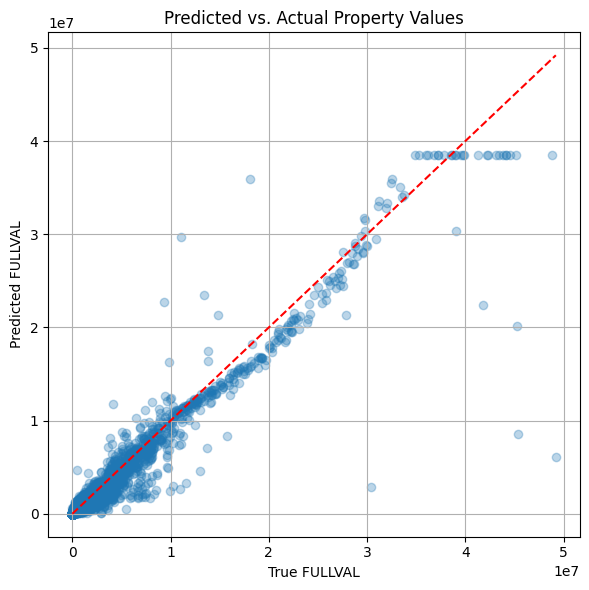

In [16]:
# Step 16: Visualize predictions vs actual values
import matplotlib.pyplot as plt
plt.figure(figsize=(6, 6))
plt.scatter(y_test_actual, y_pred, alpha=0.3)
plt.plot([y_test_actual.min(), y_test_actual.max()], [y_test_actual.min(), y_test_actual.max()], 'r--')
plt.xlabel("True FULLVAL")
plt.ylabel("Predicted FULLVAL")
plt.title("Predicted vs. Actual Property Values")
plt.grid(True)
plt.tight_layout()
plt.show()

In [19]:
# ✅ Step 1: Save entire model
baseline_model_path = "/content/drive/My Drive/SMU_MITB_AML/Group Project/model_baseline_property_value.h5"
model.save(baseline_model_path)
print(f"✅ Saved full model to: {baseline_model_path}")

# ✅ Step 2: Save model architecture as JSON
arch_path = "/content/drive/My Drive/SMU_MITB_AML/Group Project/model_architecture.json"
with open(arch_path, "w") as f:
    f.write(model.to_json())
print(f"✅ Saved model architecture to: {arch_path}")

# ✅ Step 3: Save model weights only (optional)
weights_path = "/content/drive/My Drive/SMU_MITB_AML/Group Project/model_weights_only.weights.h5"
model.save_weights(weights_path)
print(f"✅ Saved model weights to: {weights_path}")

✅ Saved full model to: /content/drive/My Drive/SMU_MITB_AML/Group Project/model_baseline_property_value.h5
✅ Saved model architecture to: /content/drive/My Drive/SMU_MITB_AML/Group Project/model_architecture.json
✅ Saved model weights to: /content/drive/My Drive/SMU_MITB_AML/Group Project/model_weights_only.weights.h5


In [20]:
# ✅ Step 4: Save training config and evaluation results
import json

baseline_info = {
    "clip_range": "[0, 16]",
    "target_transform": "log1p -> expm1",
    "scaling": "StandardScaler",
    "feature_columns": [
        'BORO', 'BLOCK', 'LOT', 'TAXCLASS', 'LTFRONT', 'LTDEPTH',
        'AVLAND', 'AVTOT', 'BLDFRONT', 'BLDDEPTH', 'EXLAND', 'EXTOT',
        'OWNER', 'BLDGCL', 'POSTCODE', 'Borough'
    ],
    "train_test_split": "80/20",
    "epochs_trained": len(history.history['loss']),
    "final_MAE": float(mae),
    "final_R2": float(r2),
    "final_MSE": float(mse),
    "fullval_threshold": "< 5e7",
    "notes": "This is the baseline model saved after cleaning 2% sample and clipping log output to [0,16]."
}

config_path = "/content/drive/My Drive/SMU_MITB_AML/Group Project/baseline_config.json"
with open(config_path, "w") as f:
    json.dump(baseline_info, f, indent=4)

print(f"✅ Saved baseline config to: {config_path}")


✅ Saved baseline config to: /content/drive/My Drive/SMU_MITB_AML/Group Project/baseline_config.json


# Remarks on 2% NYC Housing Dataset Model

In [ ]:
# The model trained on the 2% sample of NYC property data demonstrates:
# • Strong predictive accuracy: MAE ≈ 129,684 and R² ≈ 0.9327
# • Improved generalization vs 1% model through better sample representation
# • Outlier control (FULLVAL < 5e7) effectively reduced volatility
# • Output clipping (log(FULLVAL) in [0, 16]) prevented prediction overflow
# • Stable learning curve with EarlyStopping and ReduceLROnPlateau enabled

# Key Takeaway:
# This configuration serves as a strong baseline model and reference point for future improvements,
# such as incorporating XGBoost, ensemble models, or location-specific segmentation.
# Recommended to freeze current model version and record training parameters for reproducibility.
